# A common and useful operation is to simplify the tracks to reduce their resolution. This can make the data much easier to work with because of the reduced size, but still maintain macroscopic patterns.

# This notebook shows a few different ways to do this in `trackio`.
___

In [1]:
import trackio as tio
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt

___
## Read the data from the previous notebook

In [2]:
#create the Dataset
ds = tio.read(data_path='example00')

___
## Spatial and Temporal Resampling

This is already covered [here](https://github.com/derekeden/trackio/blob/main/notebooks/08%20-%20Geometric%20Operations.ipynb) in another notebook.

___
## Decimating Tracks

This uses the Ramer–Douglas–Peucker algorithm to simplify track geometry. Because this algorithm maintains original data points from a track, it keeps accurate dynamic data at those timesteps and does not require interpolation.

In [3]:
#get original track
track_id = 'Vessel_367791140_T0'
original = ds.get_track(track_id)

#decimate track using the Douglas–Peucker algorithm
ds = ds.decimate_tracks(epsilon=10, tracks=[track_id])

Decimating tracks: 100%|██████████| 1/1 [00:00<00:00, 51.28it/s]


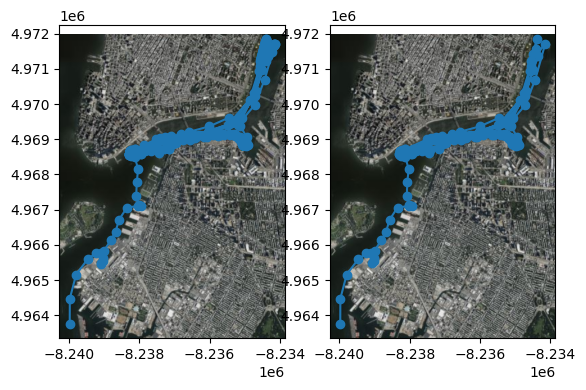

In [4]:
#get decimated track
decimated = ds.get_track(track_id)

#plot the two
fig, ax = plt.subplots(1,2)
ax[0].plot(original['X'], original['Y'], '-o')
ax[1].plot(decimated['X'], decimated['Y'], '-o')

for a in ax:
    a.set_xlim(a.get_xlim())
    a.set_ylim(a.get_ylim())
    show(rio.open('files/basemap.tif'),'r', ax=a)

## Notice the reduction in size and overall similarity between the two.

In [5]:
len(original), len(decimated)

(1403, 134)

___
## Characteristic Points

This method uses a slightly modified version of the algorithm outlined [here](http://geoanalytics.net/and/papers/tvcg11.pdf) by Natalia Andrienko and Gennady Andrienko (2010): 

In [6]:
#get original track
track_id = 'Vessel_373622000_T0'
original = ds.get_track(track_id)

#reduce track to characteristic points
ds = ds.characteristic_tracks(stop_threshold=0.15,
                              turn_threshold=10,
                              min_distance=100,
                              max_distance=1000,
                              min_stop_duration=1800,
                              tracks=[track_id],
                              inplace=True)

Extracting characteristic tracks: 100%|██████████| 1/1 [00:00<00:00, 200.01it/s]


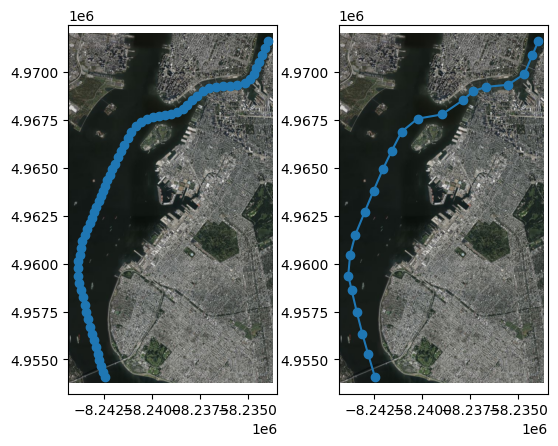

In [7]:
#get characteristic track
characteristic = ds.get_track(track_id)

#plot the two
fig, ax = plt.subplots(1,2)
ax[0].plot(original['X'], original['Y'], '-o')
ax[1].plot(characteristic['X'], characteristic['Y'], '-o')

for a in ax:
    a.set_xlim(a.get_xlim())
    a.set_ylim(a.get_ylim())
    show(rio.open('files/basemap.tif'),'r', ax=a)

# Again, notice the difference in size.

In [8]:
len(original), len(characteristic)

(66, 22)

___
## Simpifying Stops

This function reduces "stop points" to simply the start and end points that make up a given stop. This greatly reduces the number of points, while still maintaining the accurate timing of the entire stop. A stop is defined by travelling at a speed below `stop_threshold`, for at least `min_stop_duration` seconds, and if the agent drifts more than `max_drift_distance`, then that is considered the end of that particular stop.

In [9]:
#get original track
track_id = 'Vessel_368139280_T0'
original = ds.get_track(track_id)

#simplify stops
ds = ds.simplify_stops(stop_threshold=0.15,
                       min_stop_duration=1800,
                       max_drift_distance=500,
                       tracks=[track_id])

Simplifying stops along tracks: 100%|██████████| 1/1 [00:00<00:00, 250.02it/s]


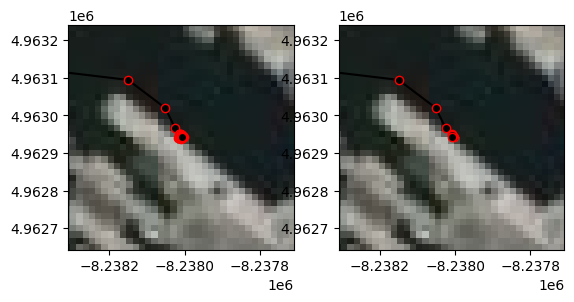

In [10]:
#get simplified track
simple = ds.get_track(track_id)

#plot the two
fig, ax = plt.subplots(1,2)

ax[0].plot(original['X'], original['Y'], '-o', c='k', markeredgecolor='r')
ax[1].plot(simple['X'], simple['Y'], '-o', c='k', markeredgecolor='r')

center = -8238009.76, 4962941.75
for a in ax:
    a.set_xlim(center[0]-300, center[0]+300)
    a.set_ylim(center[1]-300, center[1]+300)
    show(rio.open('files/basemap.tif'),'r', ax=a)

___
## Notice the rest of the track has remained untouched, but the stop has been simplified.

In [11]:
len(original), len(simple)

(928, 59)